Safwan Mahmood Al-selwi1,2,*, Mohd Fadzil Hassan2, Said Jadid Abdulkadir1,2
1> Department of Computer and Information Sciences, Universiti Teknologi PETRONAS, 32610 Seri Iskandar, Perak Darul Ridzuan, Malaysia
2> Center for Research in Data Science (CeRDaS), Universiti Teknologi PETRONAS, 32610 Seri Iskandar, Perak Darul Ridzuan, Malaysia

* Corresponding author > Safwan_21002827@utp.edu.my

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.losses import MeanAbsoluteError as MAE_LOSS
from keras.metrics import MeanAbsoluteError, MeanSquaredError, MeanAbsolutePercentageError, RootMeanSquaredError
from matplotlib import pyplot as plt
#from rich import print

In [8]:
metrics_results = []

# Set the number of time steps and the gap between relevant numbers
for n in range(10, 110, 10):
    g = 3

    # Generate the training and testing sequences
    train_seq = [i+1 for i in range(n)]
    test_seq = [i+1 for i in range(n)]

    #change some elements in the generated sequences
    for i in range(n):
        if i % g == 0:
            #print(f"i = {i}, value = {i-g+n//2}")
            train_seq[i] = train_seq[i-g]
            if ((i-g+n//2) < n):
                test_seq[i] = test_seq[i-g+n//2]


    # Reshape the input and output sequences for the model
    train_seq = np.array(train_seq).reshape((1, n, 1))
    test_seq = np.array(test_seq).reshape((1, n, 1))

    # Create the model
    model = Sequential([
        LSTM(units=32,  input_shape=(None, 1)),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss=MAE_LOSS(), metrics=[MeanAbsoluteError(), MeanSquaredError(), MeanAbsolutePercentageError(), RootMeanSquaredError()])

    #print(f"Evaluation for Sequence Length {n} ",">"*100)

    # Train the model
    model.fit(train_seq, train_seq, epochs=100, verbose=0)

    # Evaluate the model on the testing sequence
    metrics = model.evaluate(test_seq, test_seq, verbose=0)

    #Store the results in the array
    metrics_results.append(metrics)
    
np_results = np.array(metrics_results)

In [3]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 32)                4352      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [9]:
#print(metrics_results)

#Save to excel file
import pandas as pd
# Create a Pandas dataframe from the NumPy array
df = pd.DataFrame(metrics_results)

# Create an Excel writer
writer = pd.ExcelWriter('metrics_results.xlsx')

# Write the Pandas dataframe to the Excel file
df.to_excel(writer)

# Save the Excel file
writer.save()

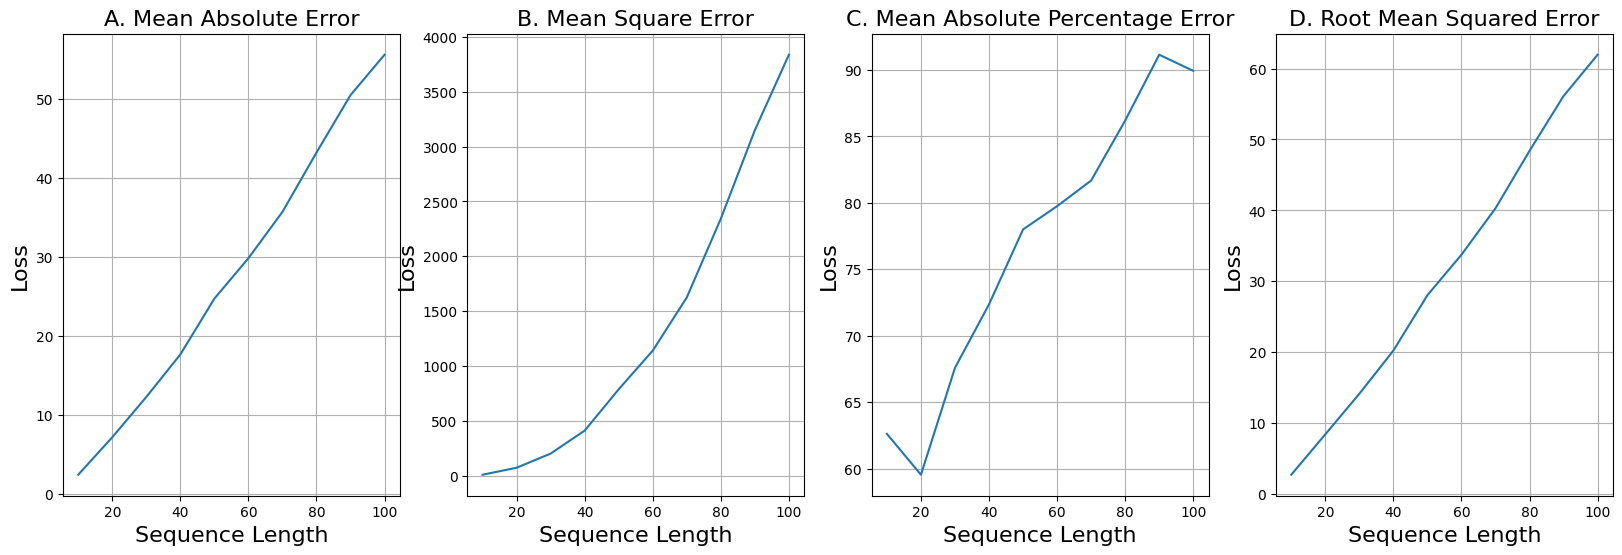

In [11]:
# Create a figure with 3 subplots arranged horizontally
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)

# set the size of the Figure to 10 inches by 6 inches
fig.set_size_inches(20, 6)

# Adjust the spacing between the subplots
#plt.subplots_adjust(wspace=0.1)

# Add grid lines to the plot
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

# Plot data on the first subplot
ax1.plot(range(10, 110, 10), np_results[:, 1])

# Plot data on the second subplot
ax2.plot(range(10, 110, 10), np_results[:, 2])

# Plot data on the third subplot
ax3.plot(range(10, 110, 10), np_results[:, 3])

# Plot data on the fourth subplot
ax4.plot(range(10, 110, 10), np_results[:, 4])

font_size = 16

#Set properties for each subplot 
ax1.set_title("A. Mean Absolute Error", fontsize=font_size)
ax1.set_xlabel('Sequence Length', fontsize=font_size)
ax1.set_ylabel('Loss', fontsize=font_size)

ax2.set_title("B. Mean Square Error", fontsize=font_size)
ax2.set_xlabel('Sequence Length', fontsize=font_size)
ax2.set_ylabel('Loss', fontsize=font_size)

ax3.set_title("C. Mean Absolute Percentage Error", fontsize=font_size)
ax3.set_xlabel('Sequence Length', fontsize=font_size)
ax3.set_ylabel('Loss', fontsize=font_size)

ax4.set_title("D. Root Mean Squared Error", fontsize=font_size)
ax4.set_xlabel('Sequence Length', fontsize=font_size)
ax4.set_ylabel('Loss', fontsize=font_size)

plt.show()